In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

mh = pd.read_csv('mental_health_prepped.csv')

mentalhealth_df = mh.drop(columns='Name')

alcoholmap = {'Low': 0, 'Moderate': 1, 'High': 2}

mentalhealth_df['Alcohol Consumption'] = mentalhealth_df['Alcohol Consumption'].map(alcoholmap)

edu_map = {'High School': 0, 'Associate Degree': 1, "Bachelor's Degree": 2, "Master's Degree": 3, 'PhD': 4}

mentalhealth_df['Education Level'] = mentalhealth_df['Education Level'].map(edu_map)

mentalhealth_df.head()

y = mentalhealth_df['Mental Illness']
X = mentalhealth_df.drop(columns='Mental Illness')



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

from sklearn.svm import SVC

svc = SVC(class_weight='balanced')
svc.fit(X_train_scaled, y_train)

svc_pred = svc.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, classification_report

cm_svm = confusion_matrix(y_test, svc_pred)

cm_svm

print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      4149
           1       0.38      0.54      0.45      1851

    accuracy                           0.59      6000
   macro avg       0.57      0.58      0.56      6000
weighted avg       0.64      0.59      0.60      6000



In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_scaled, y_train)

log_pred = logreg.predict(X_test_scaled)

cm_log = confusion_matrix(y_test, log_pred)

cm_log

print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      4149
           1       0.39      0.49      0.44      1851

    accuracy                           0.61      6000
   macro avg       0.57      0.58      0.57      6000
weighted avg       0.64      0.61      0.62      6000



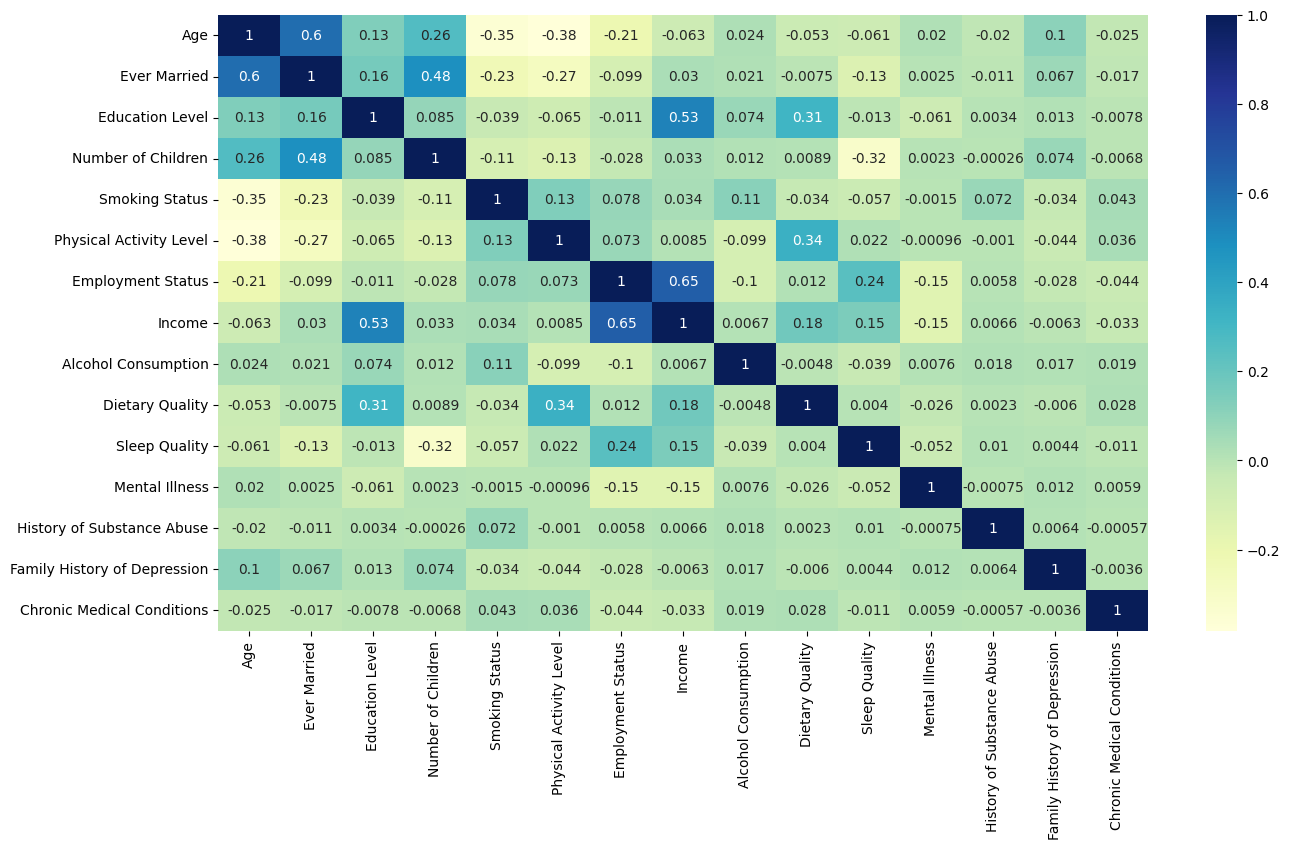

In [9]:
rcParams['figure.figsize'] = (15, 8)
sns.heatmap(mentalhealth_df.corr(), annot=True, cmap='YlGnBu')
plt.show()